In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
df1 = pd.read_csv('data/Chicago_Crimes_2005_to_2007.csv', error_bad_lines = False)
df2 = pd.read_csv('data/Chicago_Crimes_2008_to_2011.csv', error_bad_lines = False)
df3 = pd.read_csv('data/Chicago_Crimes_2012_to_2017.csv', error_bad_lines = False)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:
data = pd.concat( [df1, df2, df3] )

In [4]:
print( df1.shape, df2.shape, df3.shape)

(1872343, 23) (2688710, 23) (1456714, 23)


In [5]:
data.shape

(6017767, 23)

In [6]:
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [7]:
data.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,6.017767e+06,6.017767e+06,6.017767e+06,6.017678e+06,6.017675e+06,6.015923e+06,5.942885e+06,5.942885e+06,6.017767e+06,5.942885e+06,5.942885e+06
mean,2.104370e+06,7.037060e+06,1.191230e+03,1.130111e+01,2.265295e+01,3.784779e+01,1.164426e+06,1.885254e+06,2.009371e+03,4.184073e+01,-8.767214e+01
std,1.694528e+06,1.849589e+06,7.026427e+02,6.933820e+00,1.375739e+01,2.158409e+01,1.792610e+04,3.373090e+04,3.079192e+00,9.285315e-02,6.465034e-02
min,0.000000e+00,3.012000e+03,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.005000e+03,3.661945e+01,-9.168657e+01
25%,9.269010e+05,5.499442e+06,6.220000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152773e+06,1.858676e+06,2.007000e+03,4.176759e+01,-8.771446e+01
50%,1.679122e+06,6.932575e+06,1.034000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.165910e+06,1.889744e+06,2.009000e+03,4.185293e+01,-8.766646e+01
75%,2.839172e+06,8.359282e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.800000e+01,1.176352e+06,1.909091e+06,2.011000e+03,4.190640e+01,-8.762845e+01
max,6.254267e+06,1.082788e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.017000e+03,4.202271e+01,-8.752453e+01


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017767 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              int64
ID                      int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(7), int64(4), object(10)
memory usage: 1021.5+ MB


In [9]:
data.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 7
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1974
Arrest                      0
Domestic                    0
Beat                        0
District                   89
Ward                       92
Community Area           1844
FBI Code                    0
X Coordinate            74882
Y Coordinate            74882
Year                        0
Updated On                  0
Latitude                74882
Longitude               74882
Location                74882
dtype: int64

In [10]:
data.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Location', 'Updated On', 'FBI Code', 'Beat', 'Ward', 'Community Area', 'Location', 'District', 'ID', 'Year'], axis = 1, inplace = True)

In [11]:
data.shape

(6017767, 7)

In [13]:
data.Date = pd.to_datetime(data.Date, format = '%m/%d/%Y %I:%M:%S %p')

In [14]:
data.Date

0         2006-04-02 13:00:00
1         2006-02-26 13:40:48
2         2006-01-08 23:16:00
3         2006-04-05 18:45:00
4         2006-02-17 21:03:14
                  ...        
1456709   2016-05-03 23:33:00
1456710   2016-05-03 23:30:00
1456711   2016-05-03 00:15:00
1456712   2016-05-03 21:07:00
1456713   2016-05-03 23:38:00
Name: Date, Length: 6017767, dtype: datetime64[ns]

In [23]:
data.index = pd.DatetimeIndex(data.Date)

In [20]:
order_data = data['Primary Type'].value_counts().iloc[:15].index

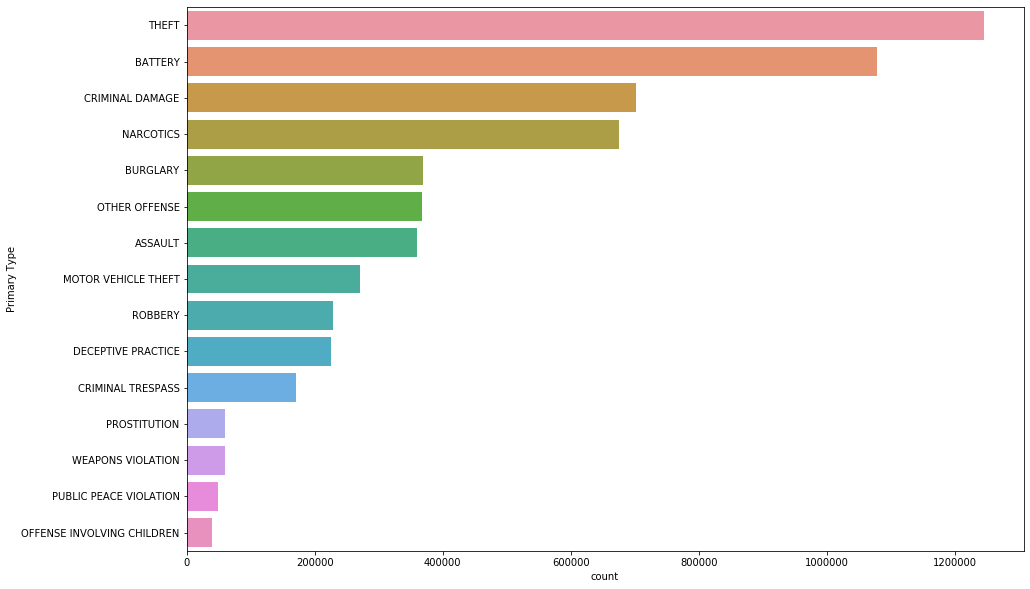

In [21]:
plt.figure( figsize = (15,10) )
sns.countplot( y = 'Primary Type', data = data, order = order_data)

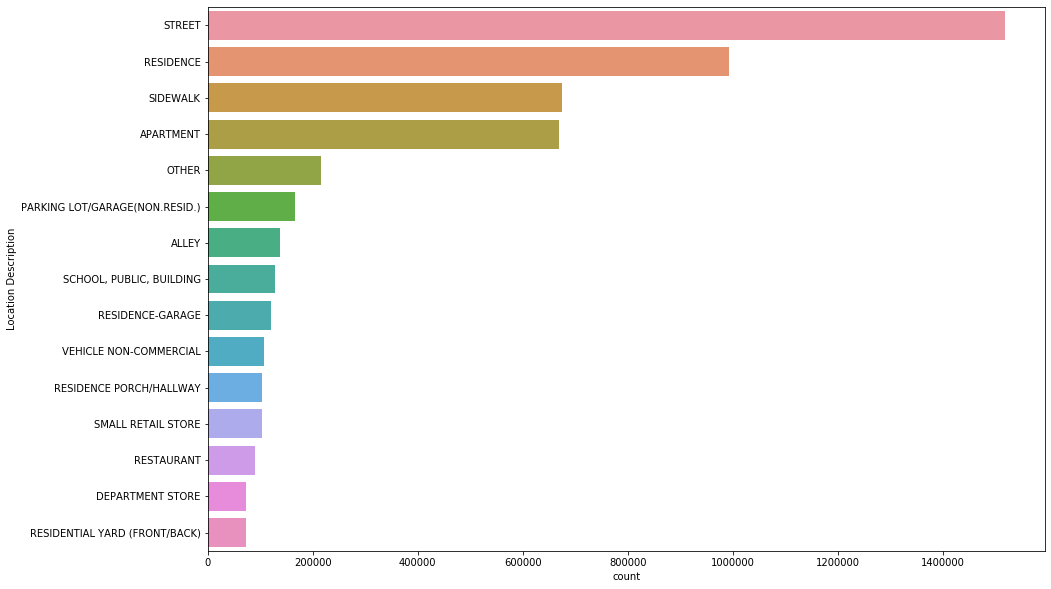

In [22]:
order_data = data['Location Description'].value_counts().iloc[:15].index

plt.figure( figsize = (15,10) )
sns.countplot( y = 'Location Description', data = data, order = order_data)

In [24]:
data.resample('Y').size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

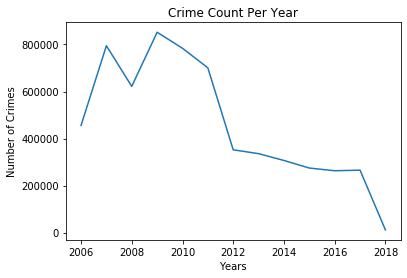

In [29]:
plt.plot(data.resample('Y').size())
plt.title('Crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

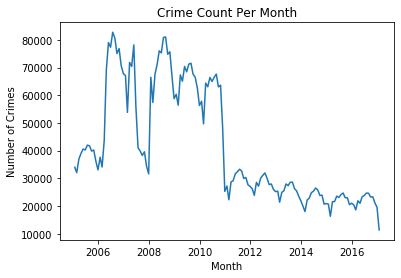

In [30]:
plt.plot(data.resample('M').size())
plt.title('Crime Count Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

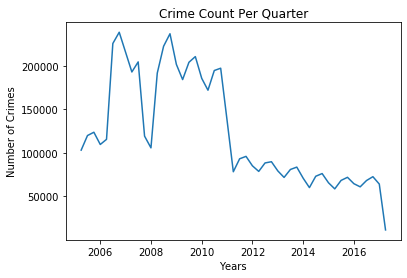

In [31]:
plt.plot(data.resample('Q').size())
plt.title('Crime Count Per Quarter')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [32]:
data_prophet = data.resample('M').size().reset_index()

In [33]:
data_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [34]:
data_prophet.columns = ['Date', 'Crime Count']

In [36]:
data_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [37]:
data_prophet_final = data_prophet.rename(columns = {'Date':'ds','Crime Count':'y'})

In [38]:
data_prophet_final

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [39]:
m = Prophet()
m.fit(data_prophet_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
future = m.make_future_dataframe( periods = 365*2 )
forecast = m.predict(future)

In [45]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60454.773642,38845.231778,71878.397996,60454.773642,60454.773642,-4762.404217,-4762.404217,-4762.404217,-4762.404217,-4762.404217,-4762.404217,0.0,0.0,0.0,55692.369426
1,2005-02-28,60322.370911,33615.174148,67718.034579,60322.370911,60322.370911,-9500.516358,-9500.516358,-9500.516358,-9500.516358,-9500.516358,-9500.516358,0.0,0.0,0.0,50821.854553
2,2005-03-31,60175.782173,42064.271347,75796.461694,60175.782173,60175.782173,-1224.151952,-1224.151952,-1224.151952,-1224.151952,-1224.151952,-1224.151952,0.0,0.0,0.0,58951.630221
3,2005-04-30,60033.922104,44740.434544,77846.419685,60033.922104,60033.922104,1182.829000,1182.829000,1182.829000,1182.829000,1182.829000,1182.829000,0.0,0.0,0.0,61216.751104
4,2005-05-31,59887.333366,47233.533114,82575.144870,59887.333366,59887.333366,5498.247964,5498.247964,5498.247964,5498.247964,5498.247964,5498.247964,0.0,0.0,0.0,65385.581330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,2019-01-27,5334.810827,-16605.866487,18041.540543,4857.666128,5832.277494,-4991.562318,-4991.562318,-4991.562318,-4991.562318,-4991.562318,-4991.562318,0.0,0.0,0.0,343.248509
871,2019-01-28,5321.744153,-17106.063241,16467.610673,4843.707700,5820.667276,-4936.449901,-4936.449901,-4936.449901,-4936.449901,-4936.449901,-4936.449901,0.0,0.0,0.0,385.294252
872,2019-01-29,5308.677480,-16698.420132,16298.053165,4829.749272,5808.838352,-4881.351476,-4881.351476,-4881.351476,-4881.351476,-4881.351476,-4881.351476,0.0,0.0,0.0,427.326004
873,2019-01-30,5295.610806,-16745.381165,17326.779024,4816.184522,5796.873118,-4829.021222,-4829.021222,-4829.021222,-4829.021222,-4829.021222,-4829.021222,0.0,0.0,0.0,466.589585


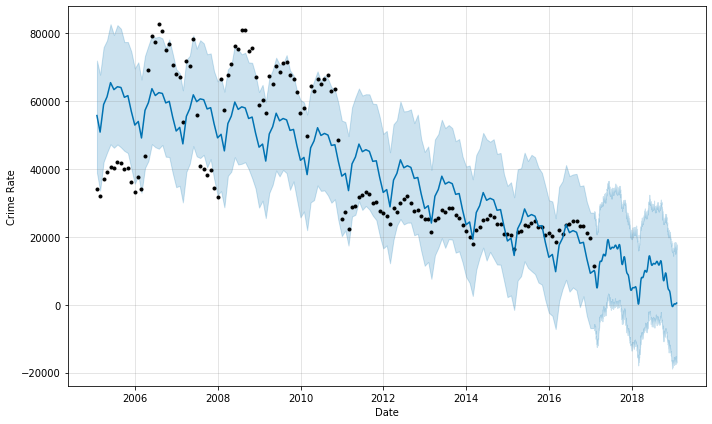

In [46]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Crime Rate')

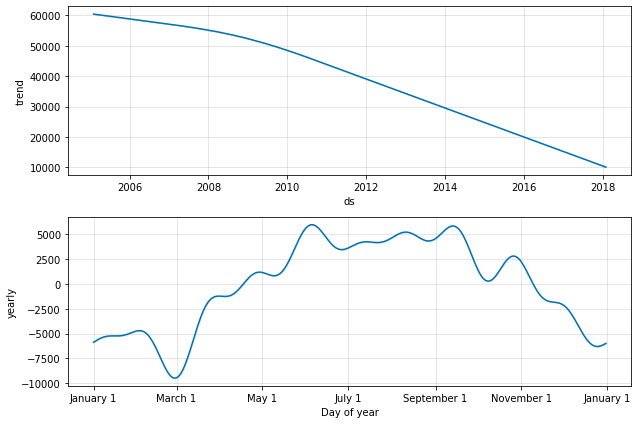

In [43]:
figure = m.plot_components(forecast)